In [1]:
import numpy as np
import pandas as pd

In [2]:
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
from prettytable import PrettyTable

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [4]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py

In [5]:
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


In [6]:
import folium
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [7]:
url = 'https://www.mohfw.gov.in/'
web_content = requests.get(url).content
soup = BeautifulSoup(web_content, "html.parser")
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
stats = [] 
all_rows = soup.find_all('tr')
for row in all_rows:
    stat = extract_contents(row.find_all('td')) 
    if len(stat) == 6:
        stats.append(stat)
new_cols = ["Sr.No", "Name of State / UT","Active Cases","Cured/Discharged/Migrated","Deaths","Total Confirmed cases"]
df = pd.DataFrame(data = stats, columns = new_cols)
df.head()

,Sr.No,Name of State / UT,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
0,1,Andaman and Nicobar Islands,46,130,0,176
1,2,Andhra Pradesh,16621,18378,452,35451
2,3,Arunachal Pradesh,306,153,3,462
3,4,Assam,6447,12173,46,18666
4,5,Bihar,6970,13462,180,20612


In [8]:
df.drop(['Sr.No'],axis=1,inplace=True)

In [9]:
df

,Name of State / UT,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
0,Andaman and Nicobar Islands,46,130,0,176
1,Andhra Pradesh,16621,18378,452,35451
2,Arunachal Pradesh,306,153,3,462
3,Assam,6447,12173,46,18666
4,Bihar,6970,13462,180,20612
5,Chandigarh,155,459,11,625
6,Chhattisgarh,1195,3324,20,4539
7,Dadra and Nagar Haveli and Daman and Diu,180,357,2,539
8,Delhi,17807,95699,3487,116993
9,Goa,1259,1674,18,2951


In [10]:
df.drop(df.tail(2).index,inplace=True)
df

,Name of State / UT,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
0,Andaman and Nicobar Islands,46,130,0,176
1,Andhra Pradesh,16621,18378,452,35451
2,Arunachal Pradesh,306,153,3,462
3,Assam,6447,12173,46,18666
4,Bihar,6970,13462,180,20612
5,Chandigarh,155,459,11,625
6,Chhattisgarh,1195,3324,20,4539
7,Dadra and Nagar Haveli and Daman and Diu,180,357,2,539
8,Delhi,17807,95699,3487,116993
9,Goa,1259,1674,18,2951


In [11]:
df['Active Cases'].dtype

dtype('O')

In [12]:
df['Active Cases'] = df['Active Cases'].map(int)

In [13]:
df['Active Cases'].dtype

dtype('int64')

In [14]:
df['Total Confirmed cases'] = df['Total Confirmed cases'].map(int)

In [15]:
df['Total Confirmed cases'] = df['Total Confirmed cases'].map(int)
df['Cured/Discharged/Migrated'] = df['Cured/Discharged/Migrated'].map(int)
df['Deaths'] = df['Deaths'].map(int)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 5 columns):
Name of State / UT           35 non-null object
Active Cases                 35 non-null int64
Cured/Discharged/Migrated    35 non-null int64
Deaths                       35 non-null int64
Total Confirmed cases        35 non-null int64
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [17]:
total_cases_overall=df['Total Confirmed cases'].sum()
print('The total number of cases till now in India is ',total_cases_overall)

The total number of cases till now in India is  967591


In [18]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
0,Andaman and Nicobar Islands,46,130,0,176
1,Andhra Pradesh,16621,18378,452,35451
2,Arunachal Pradesh,306,153,3,462
3,Assam,6447,12173,46,18666
4,Bihar,6970,13462,180,20612
5,Chandigarh,155,459,11,625
6,Chhattisgarh,1195,3324,20,4539
7,Dadra and Nagar Haveli and Daman and Diu,180,357,2,539
8,Delhi,17807,95699,3487,116993
9,Goa,1259,1674,18,2951


In [19]:
tbl = PrettyTable()
tbl.field_names = (new_cols)
for i in stats:
    tbl.add_row(i)
tbl.add_row(["","Total", 
               sum(df['Active Cases']), 
               sum(df['Cured/Discharged/Migrated']), 
               sum(df['Deaths']),
               sum(df['Total Confirmed cases'])])
print(tbl)

+-------+------------------------------------------+--------------+---------------------------+--------+-----------------------+
| Sr.No |            Name of State / UT            | Active Cases | Cured/Discharged/Migrated | Deaths | Total Confirmed cases |
+-------+------------------------------------------+--------------+---------------------------+--------+-----------------------+
|   1   |       Andaman and Nicobar Islands        |      46      |            130            |   0    |          176          |
|   2   |              Andhra Pradesh              |    16621     |           18378           |  452   |         35451         |
|   3   |            Arunachal Pradesh             |     306      |            153            |   3    |          462          |
|   4   |                  Assam                   |     6447     |           12173           |   46   |         18666         |
|   5   |                  Bihar                   |     6970     |           13462           |  

In [20]:
Total_Active_Cases=df.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()
Total_Recovery=df.groupby('Name of State / UT')['Cured/Discharged/Migrated'].sum().sort_values(ascending=False).to_frame()

In [21]:
Total_Recovery.style.background_gradient(cmap='Greens')

,Cured/Discharged/Migrated
Name of State / UT,
Maharashtra,152613
Tamil Nadu,102310
Delhi,95699
Gujarat,31286
Telangana,25999
Uttar Pradesh,25743
West Bengal,20680
Rajasthan,19502
Karnataka,18466


In [22]:
Total_Active_Cases.style.background_gradient(cmap='Reds')


,Active Cases
Name of State / UT,
Maharashtra,112099
Tamil Nadu,47343
Karnataka,27859
Delhi,17807
Andhra Pradesh,16621
Uttar Pradesh,14628
Telangana,12957
West Bengal,12747
Gujarat,11187


In [23]:
df.iplot(kind='bar',x='Name of State / UT',y='Total Confirmed cases')

In [24]:
df.iplot(kind='scatter',x='Name of State / UT',y='Cured/Discharged/Migrated',colors='green')

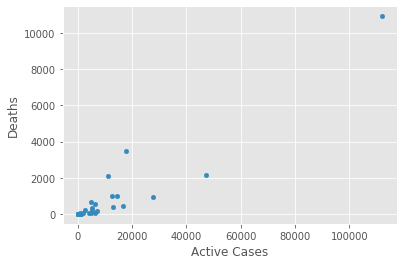

In [25]:
df.plot(kind='scatter',x='Active Cases',y='Deaths')

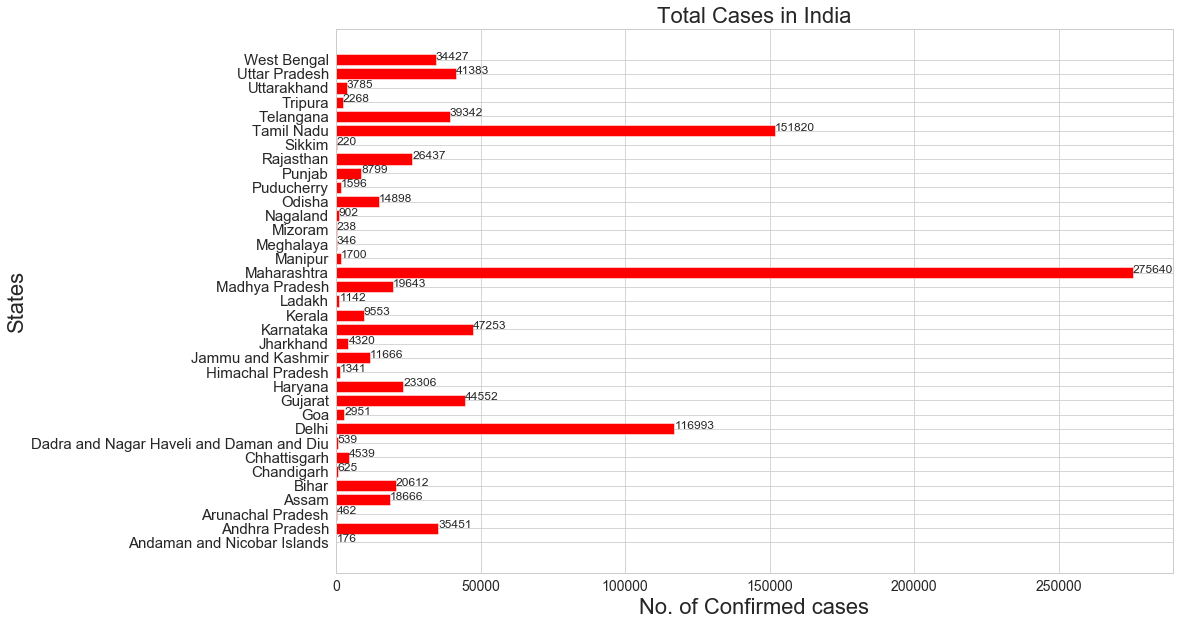

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,10))
plt.barh(df['Name of State / UT'],df['Total Confirmed cases'],align = 'center', color = 'red')#
plt.xlabel('No. of Confirmed cases', fontsize = 22)
plt.ylabel('States', fontsize = 22)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 15)
plt.title('Total Cases in India', fontsize = 22 )
for index, value in enumerate(df['Total Confirmed cases']):
    plt.text(value, index, str(value), fontsize = 12)
    
plt.show()

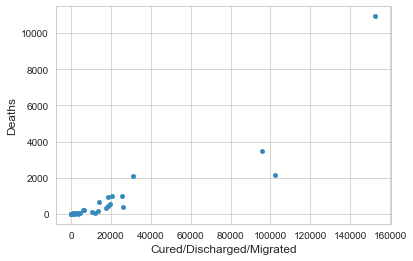

In [27]:
df.plot(kind='scatter',x='Cured/Discharged/Migrated',y='Deaths')

In [28]:
df.iplot(kind='scatter',x='Name of State / UT',y='Total Confirmed cases',mode='markers+lines',title='Covid-19',xTitle='Name of State / UT',yTitle='Total Cases',colors='red',size=20)


In [29]:
df.head()

,Name of State / UT,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
0,Andaman and Nicobar Islands,46,130,0,176
1,Andhra Pradesh,16621,18378,452,35451
2,Arunachal Pradesh,306,153,3,462
3,Assam,6447,12173,46,18666
4,Bihar,6970,13462,180,20612


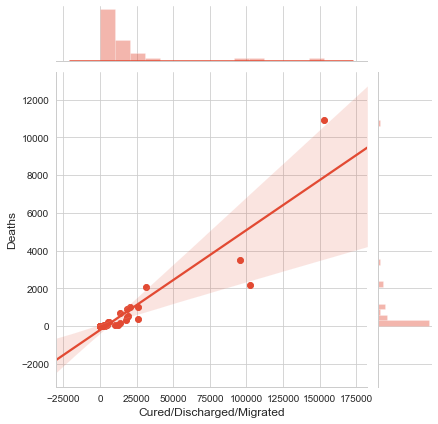

In [30]:
g=sns.jointplot(x='Cured/Discharged/Migrated',y='Deaths',data=df)
g = g.plot(sns.regplot, sns.distplot)

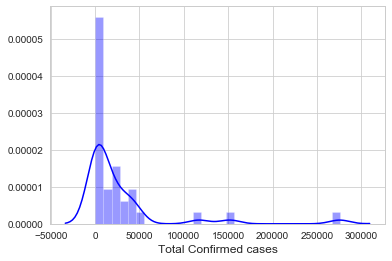

In [31]:
sns.distplot(df['Total Confirmed cases'],bins=30,kde=True,color='blue')

Text(0.5, 1, 'df.corr()')

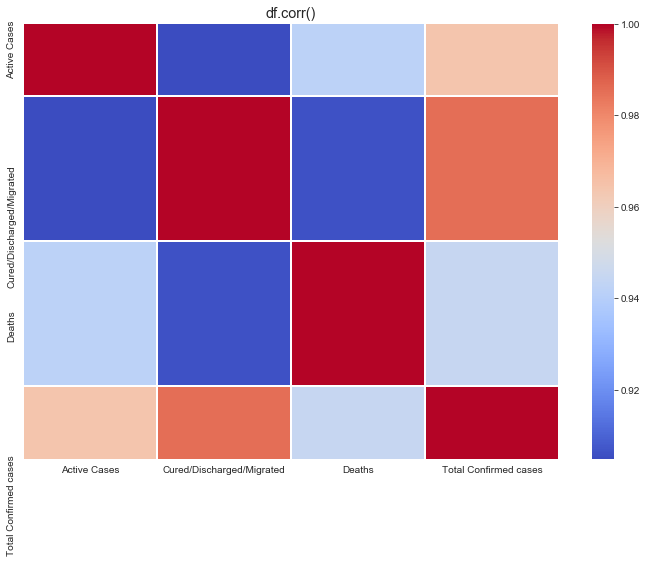

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm',linecolor='white',linewidths=1)
plt.title('df.corr()')

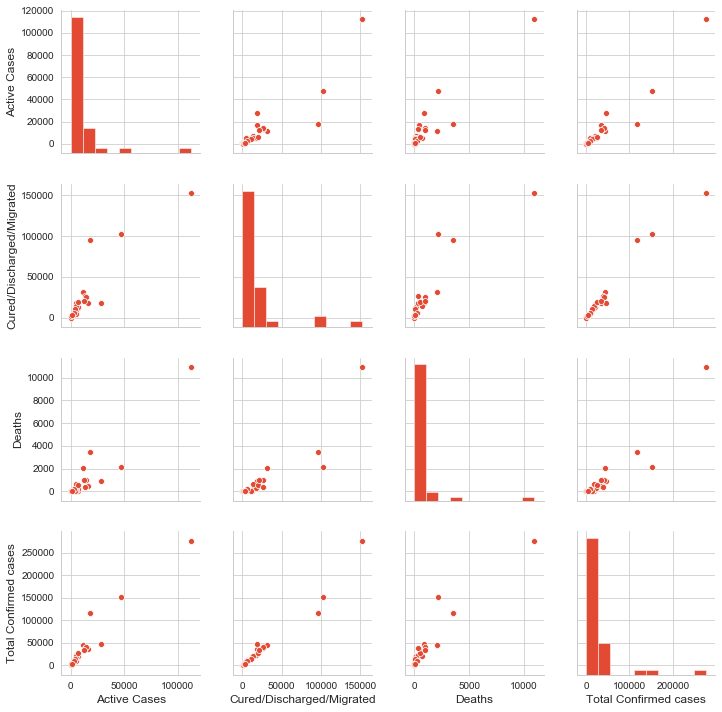

In [33]:
sns.pairplot(df,palette='coolwarm')

In [34]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df['Name of State / UT'],y=df['Active Cases'],mode='lines+markers',name='Active Cases',line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=df['Name of State / UT'],y=df['Cured/Discharged/Migrated'],mode='lines+markers',name='Cured',line=dict(color='green',width=2)))
#fig.add_trace(go.Scatter(x=df['Name of State / UT'],y=df['Total Confirmed cases'],mode='lines+markers',name='Total Cases',line=dict(color='brown',width=2)))
fig.add_trace(go.Scatter(x=df['Name of State / UT'],y=df['Deaths'],mode='lines+markers',name='Death',line=dict(color='red',width=2)))



In [35]:
fig = px.pie(df, values = 'Active Cases',names='Name of State / UT', height=600)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [36]:
map_data = gpd.read_file('Indian_States.shp')
map_data.rename(columns = {'st_nm':'Name of State / UT'}, inplace = True)

In [37]:
map_data

,Name of State / UT,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [38]:
map_data['Name of State / UT'] = map_data['Name of State / UT'].str.replace('&','and')
map_data['Name of State / UT'].replace('Arunanchal Pradesh',
                              'Arunachal Pradesh', inplace = True)
map_data['Name of State / UT'].replace('Telangana', 
                              'Telengana', inplace = True)
map_data['Name of State / UT'].replace('NCT of Delhi', 
                              'Delhi', inplace = True)
map_data['Name of State / UT'].replace('Andaman and Nicobar Island', 
                              'Andaman and Nicobar Islands', 
                               inplace = True)

In [39]:
merged_data = pd.merge(map_data, df, 
                       how = 'left', on = 'Name of State / UT')
#merged_data.fillna(0, inplace = True)
#merged_data.drop(‘Sr.No’, axis = 1, inplace = True)
merged_data

,Name of State / UT,geometry,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",46.0,130.0,0.0,176.0
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",306.0,153.0,3.0,462.0
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",6447.0,12173.0,46.0,18666.0
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",6970.0,13462.0,180.0,20612.0
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",155.0,459.0,11.0,625.0
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",1195.0,3324.0,20.0,4539.0
6,Dadara and Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",NaN,NaN,NaN,NaN
7,Daman and Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",NaN,NaN,NaN,NaN
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",1259.0,1674.0,18.0,2951.0
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",11187.0,31286.0,2079.0,44552.0


C:\Users\Win10\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning:

invalid value encountered in less



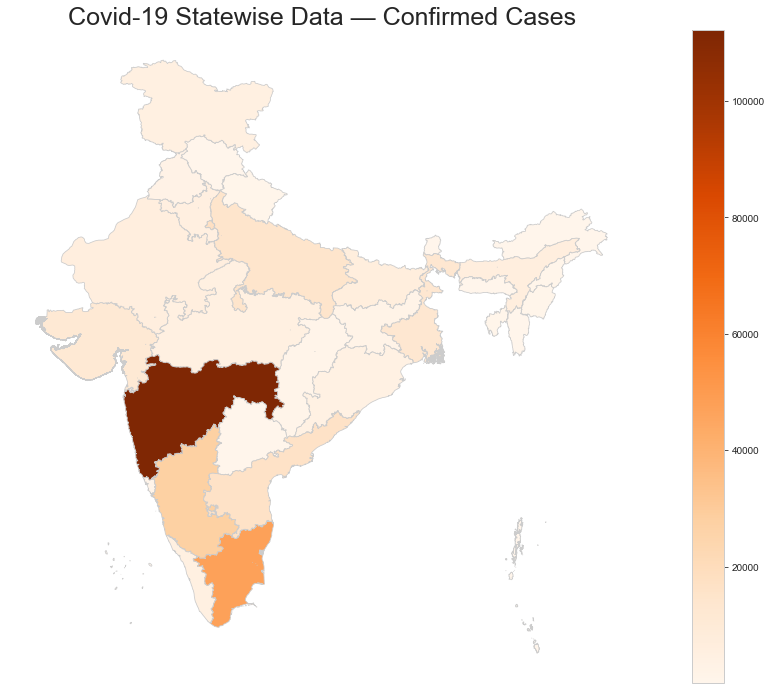

In [40]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data — Confirmed Cases', 
             fontdict =  {'fontsize': '25', 'fontweight' : '3'})
merged_data.plot(column = 'Active Cases', cmap='Oranges', 
                 linewidth=0.8, ax=ax, edgecolor='0.8', 
                 legend = True)
plt.show()

In [41]:
Indian_Cord=pd.read_excel("Indian Coordinates.xlsx")
Indian_Cord


,Name of State / UT,Latitude,Longitude
0,Andaman and Nicobar Islands,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [42]:
df

,Name of State / UT,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
0,Andaman and Nicobar Islands,46,130,0,176
1,Andhra Pradesh,16621,18378,452,35451
2,Arunachal Pradesh,306,153,3,462
3,Assam,6447,12173,46,18666
4,Bihar,6970,13462,180,20612
5,Chandigarh,155,459,11,625
6,Chhattisgarh,1195,3324,20,4539
7,Dadra and Nagar Haveli and Daman and Diu,180,357,2,539
8,Delhi,17807,95699,3487,116993
9,Goa,1259,1674,18,2951


In [43]:
df_full=pd.merge(Indian_Cord,df,on='Name of State / UT')

In [44]:
df_full

,Name of State / UT,Latitude,Longitude,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
0,Andhra Pradesh,14.750429,78.570026,16621,18378,452,35451
1,Bihar,25.785414,87.479973,6970,13462,180,20612
2,Chandigarh,30.719997,76.780006,155,459,11,625
3,Chhattisgarh,22.090420,82.159987,1195,3324,20,4539
4,Delhi,28.669993,77.230004,17807,95699,3487,116993
5,Goa,15.491997,73.818001,1259,1674,18,2951
6,Haryana,28.450006,77.019991,5320,17667,319,23306
7,Jammu and Kashmir,33.450000,76.240000,5123,6337,206,11666
8,Karnataka,12.570381,76.919997,27859,18466,928,47253
9,Kerala,8.900373,76.569993,4884,4634,35,9553


In [45]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Confirmed cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.0009,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.2).add_to(map)
    

In [46]:
map

In [47]:
fd = pd.read_csv("covid_19_data(1st three months).csv")

In [48]:
fd = fd.rename(columns={'Country/Region':'Country'})
fd = fd.rename(columns={'ObservationDate':'Date'})
fd.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [49]:
fd_countries = fd.groupby(['Country', 'Date']).max().reset_index() #.sort_values('Date', ascending=False)
fd_countries.head()

,Country,Date,Confirmed,Deaths,Last Update,Recovered,SNo
0,Azerbaijan,02/28/2020,1.0,0.0,2020-02-28T15:03:26,0.0,2664
1,"('St. Martin',)",03/10/2020,2.0,0.0,2020-03-10T05:33:02,0.0,4675
2,Afghanistan,02/24/2020,1.0,0.0,2020-02-24T23:33:02,0.0,2259
3,Afghanistan,02/25/2020,1.0,0.0,2020-02-24T23:33:02,0.0,2352
4,Afghanistan,02/26/2020,1.0,0.0,2020-02-24T23:33:02,0.0,2453


In [50]:
fd_countries = fd.groupby(['Country', 'Date']).max().reset_index() .sort_values('Date', ascending=False)
fd_countries = fd_countries.drop_duplicates(subset = ['Country'])
fd_countries = fd_countries[fd_countries['Confirmed']>0]

fd_countries

,Country,Date,Confirmed,Deaths,Last Update,Recovered,SNo
1454,Haiti,03/24/2020,7.0,0.0,2020-03-24 23:41:50,0.0,8275
1278,Georgia,03/24/2020,70.0,0.0,2020-03-24 23:41:50,9.0,8267
1449,Guyana,03/24/2020,5.0,1.0,2020-03-24 23:41:50,0.0,8274
1436,Guinea,03/24/2020,4.0,0.0,2020-03-24 23:41:50,0.0,8273
1416,Guatemala,03/24/2020,21.0,1.0,2020-03-24 23:41:50,0.0,8272
...,...,...,...,...,...,...,...
2889,Palestine,03/09/2020,22.0,0.0,2020-03-07T02:23:06,0.0,4322
4171,Vatican City,03/09/2020,1.0,0.0,2020-03-06T15:43:02,0.0,4507
3077,Republic of Ireland,03/08/2020,21.0,0.0,2020-03-08T21:03:03,0.0,4067
0,Azerbaijan,02/28/2020,1.0,0.0,2020-02-28T15:03:26,0.0,2664


In [51]:
data = dict(
        type = 'choropleth',
         locations = fd_countries['Country'],
        locationmode = 'country names',
        z = fd_countries['Confirmed'],
        colorscale = 'reds',
    colorbar={'title':'Confirmed cases'},
   # reversescale = True,
        marker_line_color = 'black',
        marker_line_width = 0.5
) 

In [52]:
layout = dict(
   title_text = 'Covid-19 in First Three month',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showlakes = True,
        showcoastlines = True,
        showocean=False,
        showrivers=True,
        showsubunits =True,
        projection = {'type':'natural earth'}
    )
)

In [53]:
layout

{'title_text': 'Covid-19 in First Three month',
 'title_x': 0.5,
 'geo': {'showframe': False,
  'showlakes': True,
  'showcoastlines': True,
  'showocean': False,
  'showrivers': True,
  'showsubunits': True,
  'projection': {'type': 'natural earth'}}}

In [54]:
choromap = go.Figure(data = [data],layout = layout)

In [55]:
iplot(choromap)